In [14]:
#import liabraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



In [15]:
'''
In this exercise session you will use a real dataset to train a regression tree model. The dataset includes information about taxi tip and was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). You will use the trained model to predict the amount of tip paid.
     # read the input data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'


The dataset contains the following relevant columns:

VendorID: ID of the vendor
passenger_count: Number of passengers
trip_distance: Distance of the trip
RatecodeID: Rate code of the trip
store_and_fwd_flag: Whether the trip data was stored before forwarding
PULocationID & DOLocationID: Pickup and drop-off locations
payment_type: Payment method (1 = Credit card, 2 = Cash, etc.)
fare_amount: Fare charged for the trip
mta_tax: NYC tax for the trip
tolls_amount: Toll charges during the trip
improvement_surcharge: Additional surcharge
tip_amount: Tip paid by the passenger (our target variable)
'''
#load the dataset
url='C:\AI and ML\Machine Learning\Machine-Learning\Decision_Regression_tree\yellow_tripdata.csv'

df = pd.read_csv(url)
# Display basic information about the dataset
df.info(),df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41202 entries, 0 to 41201
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               41202 non-null  int64  
 1   passenger_count        41202 non-null  int64  
 2   trip_distance          41202 non-null  float64
 3   RatecodeID             41202 non-null  int64  
 4   store_and_fwd_flag     41202 non-null  int64  
 5   PULocationID           41202 non-null  int64  
 6   DOLocationID           41202 non-null  int64  
 7   payment_type           41202 non-null  int64  
 8   fare_amount            41202 non-null  float64
 9   mta_tax                41202 non-null  float64
 10  tolls_amount           41202 non-null  float64
 11  improvement_surcharge  41202 non-null  int64  
 12  tip_amount             41202 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 4.1 MB


(None,
    VendorID  passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  \
 0         2                1          17.63           2                   1   
 1         2                1          19.52           2                   1   
 2         2                1          17.81           2                   1   
 3         2                2          19.30           2                   1   
 4         2                1          18.75           2                   1   
 
    PULocationID  DOLocationID  payment_type  fare_amount  mta_tax  \
 0           132           164             1         70.0      0.5   
 1           132           236             1         70.0      0.5   
 2           132            48             1         70.0      0.5   
 3           132           148             1         70.0      0.5   
 4           132           234             1         70.0      0.5   
 
    tolls_amount  improvement_surcharge  tip_amount  
 0          6.94                   

In [16]:
'''check for missing vakues
 
 '''
missing_values = df.isnull().sum()

#drop unnecessary columns
column_to_remove=['VendorID','store_and_fwd_flag','RatecodeID','PULocationID','DOLocationID']
df_cleaned=df.drop(columns=column_to_remove)

#display missing values
missing_values,df.head()


(VendorID                 0
 passenger_count          0
 trip_distance            0
 RatecodeID               0
 store_and_fwd_flag       0
 PULocationID             0
 DOLocationID             0
 payment_type             0
 fare_amount              0
 mta_tax                  0
 tolls_amount             0
 improvement_surcharge    0
 tip_amount               0
 dtype: int64,
    VendorID  passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  \
 0         2                1          17.63           2                   1   
 1         2                1          19.52           2                   1   
 2         2                1          17.81           2                   1   
 3         2                2          19.30           2                   1   
 4         2                1          18.75           2                   1   
 
    PULocationID  DOLocationID  payment_type  fare_amount  mta_tax  \
 0           132           164             1         70.0      0.5   

In [17]:
'''
our target variable is tip_amount. We will use the rest of the columns as features to train the model.

'''
X=df.drop(columns=['tip_amount'])
y=df['tip_amount']
'''
X Removes the tip column from the dataset and stores the remaining columns in X.
Why?:
X represents the features (input variables) used to predict the tip.

y = df['tip_amount']
What it does: Selects the Drug colu = df.drop(columns=['tip_amount'])
mn and stores it in y.
Why?:
y is the target variable (labels) that the model will learn to predict.
'''

"\nX Removes the tip column from the dataset and stores the remaining columns in X.\nWhy?:\nX represents the features (input variables) used to predict the tip.\n\ny = df['tip_amount']\nWhat it does: Selects the Drug colu = df.drop(columns=['tip_amount'])\nmn and stores it in y.\nWhy?:\ny is the target variable (labels) that the model will learn to predict.\n"

In [18]:
#training the model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [19]:
#train a decision regression tree model
model=DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
#predict the tip amount
y_pred=model.predict(X_test)

#calculate the mean squared error
mse=mean_squared_error(y_test,y_pred)
#print mse
mse

42.62871155139839

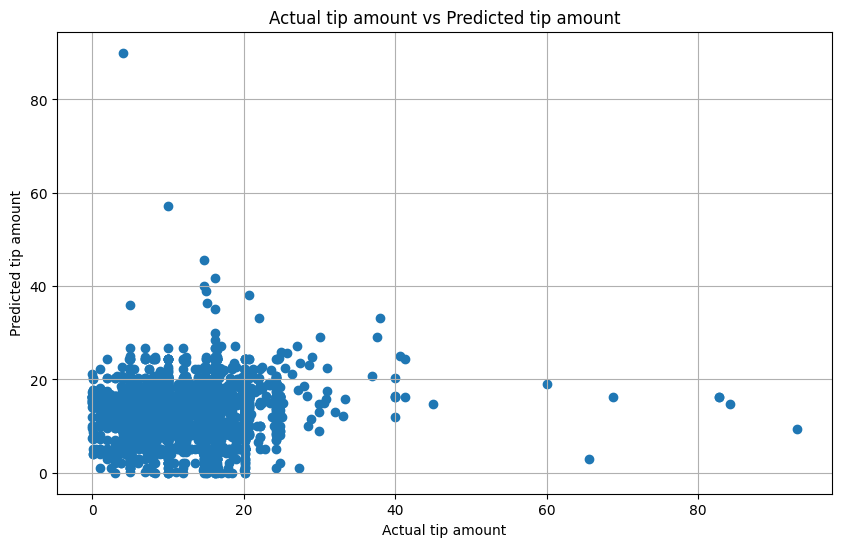

In [22]:
#plot scatter
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual tip amount')
plt.ylabel('Predicted tip amount')
plt.title('Actual tip amount vs Predicted tip amount')
plt.grid(True)
plt.show()